## ML Challenge 2021

In [15]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.datasets import load_boston
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs





file = open("train-1.json")
train_dict = json.load(file)
file.close()

print(len(train_dict))

file1=open('test.json')
test_dict= json.load(file1)
file1.close()
print(len(test_dict))

9658
1000


/Users/edoardosaldarelli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.DataFrame(train_dict)
df = df.drop(columns=["doi", "authors", "venue", "is_open_access"])
df.shape
df.head()



,title,abstract,year,references,topics,fields_of_study,citations
0,Generating High Quality Proposition Banks for ...,Semantic role labeling (SRL) is crucial to nat...,2015.0,39,[Semantic role labeling],[Computer Science],60
1,One of these words is not like the other: a re...,Word embeddings are an active topic in the NLP...,2020.0,44,[],[Computer Science],1
2,The Code2Text Challenge: Text Generation in So...,We propose a new shared task for tactical data...,2017.0,30,"[Natural language generation, Library (computi...",[Computer Science],5
3,The Meaning Factory at SemEval-2017 Task 9: Pr...,We evaluate a semantic parser based on a chara...,2017.0,11,"[Parsing, Convolutional neural network, Text-b...",[Computer Science],5
4,Semantic Parsing for Textual Entailment,In this paper we gauge the utility of general-...,2015.0,26,"[Textual entailment, Parsing, SemEval, Semanti...",[Computer Science],10


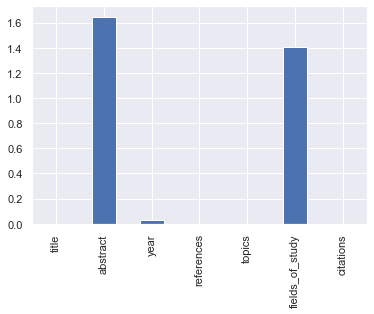

In [3]:
df["fields_of_study"].value_counts()

pds = (df[df.columns].isna().sum() / len(df.index))*100
ax = pds.plot.bar()

In [4]:
df.isna().sum()

title                0
abstract           159
year                 3
references           0
topics               0
fields_of_study    136
citations            0
dtype: int64

In [5]:
df["fields_of_study"] = df["fields_of_study"].fillna(0)

logreg = LogisticRegression()

cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()


NameError: name 'LogisticRegression' is not defined

In [6]:
train, validation = train_test_split(df, test_size = 0.20, random_state = 42)
y_train = train['citations']

In [7]:
len(train)
len(validation)
train.count(axis= 0)

title              7726
abstract           7601
year               7724
references         7726
topics             7726
fields_of_study    7726
citations          7726
dtype: int64

In [8]:
print(train["references"].value_counts())
print('---Number of references from lowest to highest---')
print(train["citations"].value_counts())
print('---Number of citations from lowest to highest---')
print(train["year"].value_counts())
print('---Check from 1979 to 2021, how many books, periodicals published in each year---')

0      223
24     222
22     215
25     215
21     207
      ... 
163      1
373      1
98       1
110      1
301      1
Name: references, Length: 165, dtype: int64
---Number of references from lowest to highest---
0       975
1       678
2       514
3       416
4       382
       ... 
1553      1
1169      1
5259      1
977       1
1885      1
Name: citations, Length: 378, dtype: int64
---Number of citations from lowest to highest---
2019.0    1271
2020.0    1139
2018.0     901
2021.0     863
2017.0     656
2016.0     642
2015.0     629
2014.0     597
1998.0      94
2002.0      79
2003.0      75
2000.0      73
2006.0      62
1997.0      57
2005.0      56
1996.0      46
1984.0      39
1999.0      36
2004.0      36
1994.0      28
2001.0      27
1988.0      24
2013.0      23
1983.0      22
1993.0      20
1992.0      19
2011.0      18
1991.0      16
1985.0      16
1990.0      16
2012.0      16
2010.0      14
1980.0      14
1987.0      14
1989.0      12
1982.0      11
2008.0      10
1995.0

In [9]:

print(train.abstract.value_counts())
train["abstract"].head()

Authors and publishers who wish their publications to be considered for review in Computational Linguistics should send a copy to the book review editor, Graeme Hirst, Department of Computer Science, University of Toronto, Toronto, Canada M5S 3G4. All relevant books received will be listed, but not all can be reviewed. Technical reports (other than dissertations) will not be listed or reviewed. Authors should be aware that some publishers will not send books for review (even when instructed to do so); authors wishing to inquire as to whether their book has been received for review may contact the book review editor.                                                                                                                                                                                                                                                                                                                                                                                         

510     In this paper I propose a generalization of le...
1965    We propose a novel method for acquiring entail...
4504                                                 None
9622    This paper reports on the BEA-2019 Shared Task...
4292    Automatic math problem solving has recently at...
Name: abstract, dtype: object

In [10]:
print(train.title.value_counts())
train["title"].value_counts()

Publications Received                                                                                   6
The Text REtrieval Conferences (TRECs)                                                                  2
Accumulation of Lexical Sets: Acquisition of Dictionary Resources and Production of New Lexical Sets    2
Briefly Noted                                                                                           2
Combining Outputs of Multiple Japanese Named Entity Chunkers by Stacking                                1
                                                                                                       ..
nlpUP at SemEval-2019 Task 6: A Deep Neural Language Model for Offensive Language Detection             1
What do character-level models learn about morphology? The case of dependency parsing                   1
Paraphrasing with Large Language Models                                                                 1
How Good is Your Tokenizer? On the Monolingual

Publications Received                                                                                   6
The Text REtrieval Conferences (TRECs)                                                                  2
Accumulation of Lexical Sets: Acquisition of Dictionary Resources and Production of New Lexical Sets    2
Briefly Noted                                                                                           2
Combining Outputs of Multiple Japanese Named Entity Chunkers by Stacking                                1
                                                                                                       ..
nlpUP at SemEval-2019 Task 6: A Deep Neural Language Model for Offensive Language Detection             1
What do character-level models learn about morphology? The case of dependency parsing                   1
Paraphrasing with Large Language Models                                                                 1
How Good is Your Tokenizer? On the Monolingual

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='year', ylabel='references'>

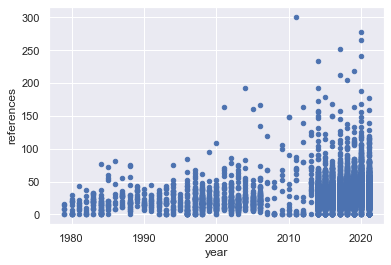

In [11]:
train[train["references"] <= 301].sample(7700).plot.scatter(x = "year", y = "references")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='year', ylabel='citations'>

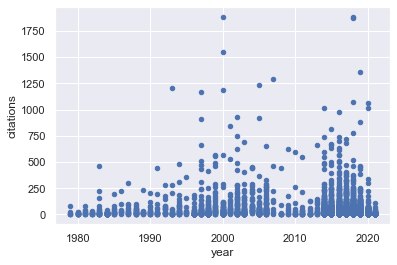

In [12]:
train[train["citations"] <= 1885].sample(7700).plot.scatter(x = "year", y = "citations")

In [13]:
corr, p_value = pearsonr(train['references'], train['citations'])

print('The correlation is ' + str(corr))
print('The p-value is ' + str(p_value))




The correlation is 0.066079276529615
The p-value is 6.113284442052579e-09


In [14]:
df2 = pd.DataFrame(test_dict)
df2.shape
df2.head()
df2 = df2.drop(columns=["doi", "authors", "venue", "is_open_access"])
df2.head()

,title,fields_of_study,abstract,year,references,topics
0,On Sparsifying Encoder Outputs in Sequence-to-...,[Computer Science],Sequence-to-sequence models usually transfer a...,2021,47,"[Encoder, Transformer, Automatic summarization..."
1,To Pretrain or Not to Pretrain: Examining the ...,"[Computer Science, Mathematics]",Pretraining NLP models with variants of Masked...,2020,18,"[Supervised learning, Language model, Document..."
2,Utilization of Nganasan digital resources: a s...,[Computer Science],"According to the wide-spread belief, although ...",2018,8,"[Rounding, Lexicon, Tracer, Body of uterus, Cl..."
3,A large-scale study of the effects of word fre...,[Computer Science],A number of psycholinguistic studies have fact...,2019,52,"[Word lists by frequency, Text corpus, Sentenc..."
4,Amherst685 at SemEval-2021 Task 7: Joint Model...,[Computer Science],This paper describes our submission to theSemE...,2021,17,[]


In [18]:
df = pd.DataFrame(train_dict)
df = df.drop(columns=["doi", "authors", "venue", "is_open_access"])
df.shape
df.head()



,title,abstract,year,references,topics,fields_of_study,citations
0,Generating High Quality Proposition Banks for ...,Semantic role labeling (SRL) is crucial to nat...,2015.0,39,[Semantic role labeling],[Computer Science],60
1,One of these words is not like the other: a re...,Word embeddings are an active topic in the NLP...,2020.0,44,[],[Computer Science],1
2,The Code2Text Challenge: Text Generation in So...,We propose a new shared task for tactical data...,2017.0,30,"[Natural language generation, Library (computi...",[Computer Science],5
3,The Meaning Factory at SemEval-2017 Task 9: Pr...,We evaluate a semantic parser based on a chara...,2017.0,11,"[Parsing, Convolutional neural network, Text-b...",[Computer Science],5
4,Semantic Parsing for Textual Entailment,In this paper we gauge the utility of general-...,2015.0,26,"[Textual entailment, Parsing, SemEval, Semanti...",[Computer Science],10


In [22]:
print(train.fields_of_study.value_counts())
train["fields_of_study"]

[Computer Science]                              7189
[Computer Science, Mathematics]                  132
0                                                108
[Psychology]                                      42
[Computer Science, Psychology]                    39
[Computer Science, Engineering]                   24
[Computer Science, Medicine]                      24
[Psychology, Computer Science]                    14
[Engineering, Computer Science]                   10
[Mathematics]                                     10
[Computer Science, Sociology]                     10
[Computer Science, Political Science]              9
[Political Science]                                9
[History]                                          8
[Computer Science, History]                        7
[Mathematics, Computer Science]                    7
[Engineering]                                      7
[Sociology]                                        7
[Political Science, Computer Science]         

510                  [Computer Science]
1965                 [Computer Science]
4504    [Computer Science, Engineering]
9622                 [Computer Science]
4292                 [Computer Science]
                     ...               
5734                 [Computer Science]
5191                 [Computer Science]
5390                                  0
860                  [Computer Science]
7270                 [Computer Science]
Name: fields_of_study, Length: 7726, dtype: object

In [23]:
print(train.topics.value_counts())
train["topics"]

[]                                                                                                                                                                                                                                                                                                     1717
[Natural language processing]                                                                                                                                                                                                                                                                            12
[Machine translation]                                                                                                                                                                                                                                                                                    10
[Neural machine translation]                                                                        

510     [WordNet, Lexicography, Language model, Knowle...
1965    [Vertex-transitive graph, Lexical substitution...
4504                                        [Text corpus]
9622                                [Test data, Test set]
4292                                                   []
                              ...                        
5734                                                   []
5191    [Long short-term memory, Natural language, Net...
5390    [Learning to rank, Information retrieval, Coll...
860                       [Data compression, Computation]
7270    [Text corpus, Lemmatisation, Lexical analysis,...
Name: topics, Length: 7726, dtype: object

In [29]:
df_num = train.drop('title', axis=1)
df_num.head()


,abstract,year,references,topics,fields_of_study,citations
510,In this paper I propose a generalization of le...,1992.0,12,"[WordNet, Lexicography, Language model, Knowle...",[Computer Science],73
1965,We propose a novel method for acquiring entail...,2015.0,26,"[Vertex-transitive graph, Lexical substitution...",[Computer Science],7
4504,None,2015.0,0,[Text corpus],"[Computer Science, Engineering]",0
9622,This paper reports on the BEA-2019 Shared Task...,2019.0,53,"[Test data, Test set]",[Computer Science],98
4292,Automatic math problem solving has recently at...,2021.0,41,[],[Computer Science],2


In [33]:
train.drop(['title'], axis=1, inplace=True)

/Users/edoardosaldarelli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
train

,year,references,citations
510,1992.0,12,73
1965,2015.0,26,7
4504,2015.0,0,0
9622,2019.0,53,98
4292,2021.0,41,2
...,...,...,...
5734,2020.0,38,10
5191,2017.0,40,679
5390,2012.0,0,0
860,1984.0,25,23


In [36]:
from sklearn.preprocessing import StandardScaler
X = train.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.81119716,  0.21527882],
       [-0.24949526, -0.16013281],
       [-1.29265592, -0.1999492 ],
       ...,
       [-1.29265592, -0.1999492 ],
       [-0.28961683, -0.06912393],
       [-0.32973839, -0.19426114]])

In [37]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [45]:
train.groupby('Index').mean()

,year,references,citations,Clus_km
Index,,,,
0,2015.431511,31.972743,23.407417,0
1,2009.400000,23.200000,5376.800000,1
2,2009.355556,53.555556,734.244444,2


In [46]:
train.drop(['Clus_km'], axis=1, inplace=True)

/Users/edoardosaldarelli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
train.groupby('Index').mean()

,year,references,citations
Index,,,
0,2015.431511,31.972743,23.407417
1,2009.400000,23.200000,5376.800000
2,2009.355556,53.555556,734.244444


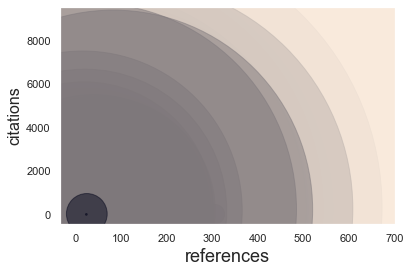

In [55]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('references', fontsize=18)
plt.ylabel('citations', fontsize=16)

plt.show()

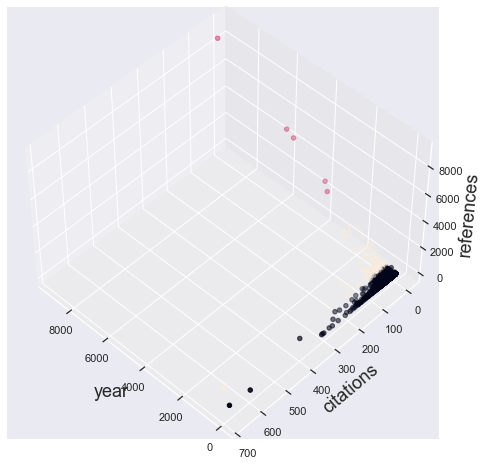

In [61]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('year',fontsize=18)
ax.set_ylabel('citations',fontsize=18)
ax.set_zlabel('references',fontsize=18)

ax.scatter(X[:, 1], X[:, 0], X[:, 1], c= labels.astype(np.float))

In [64]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(Clus_dataSet))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()
    



TypeError: unhashable type: 'numpy.ndarray'

<Figure size 432x288 with 0 Axes>

In [ ]:
# ABSTRACT, CITATIONS, 